# Grafos

In [1]:
# install.packages('igraph')
library(igraph)
library(ggplot2)
library(repr)
options(repr.plot.width= 4, repr.plot.height=4)

Warning message:
"package 'igraph' was built under R version 3.6.3"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



## Grafos Básico - graph

- Para gerar um gráfico direcionado, basta colocar o par de vértices separados por vírgula (a,b)
- Desta forma, iremos introduzir uma aresta na direção a -> b

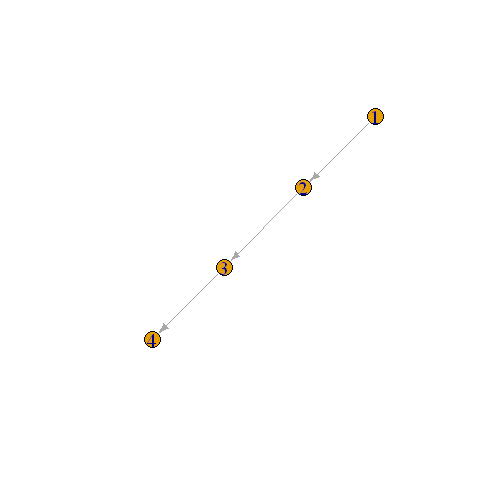

In [16]:
graphic = graph(edge=c(1,2, 2,3, 3,4))
plot(graphic)

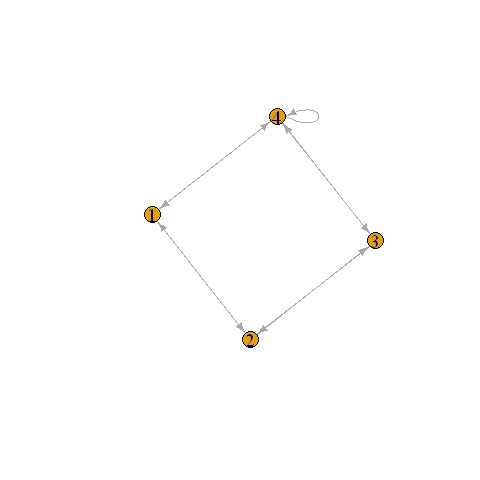

In [19]:
graphic = graph(edge=c(1,2, 2,3, 3,4, 4,3, 3,2, 2,1, 4,4, 4,1, 1,4))
plot(graphic)

- Dados
    - **D** e **U** - Direcionado e Não-direcionado
    - **N** - nome do grafo
    - **W** - grafo ponderado (peso nas arestas)
    - **B** - tipo do grafo

In [33]:
graphic = graph(edge=c(1,2, 2,3, 3,4, 4,1))
graphic

IGRAPH 67ae3c5 D--- 4 4 -- 
+ edges from 67ae3c5:
[1] 1->2 2->3 3->4 4->1

- Gerar Grafo não-direcionado

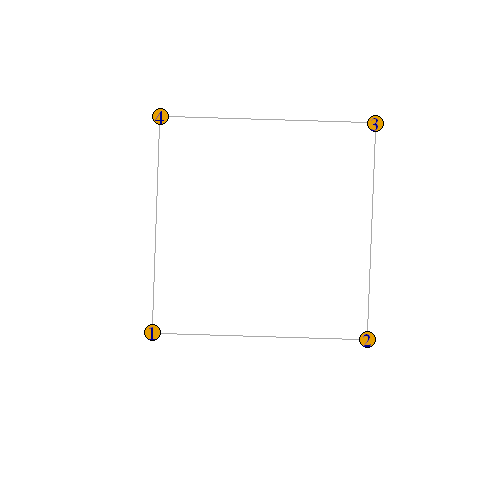

In [36]:
graphic = graph(edge=c(1,2, 2,3, 3,4, 4,1), directed=F)
plot(graphic)

- O parâmetro n define o número total de elementos do grafo, caso seja maior que os definidos, eles serão vertices isolados

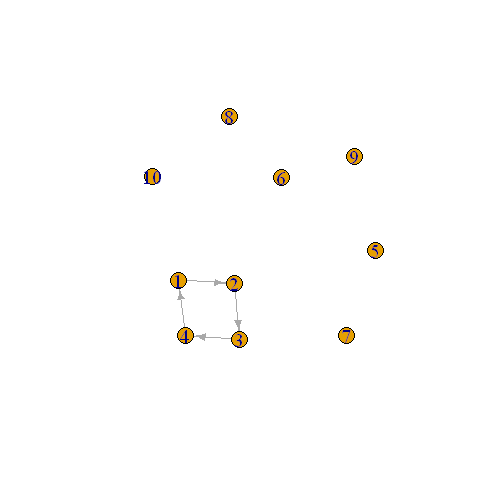

In [37]:
graphic = graph(edge=c(1,2, 2,3, 3,4, 4,1), n=10)
plot(graphic)

- Para nomear os vértices, basta atribuir uma string ao invés de números

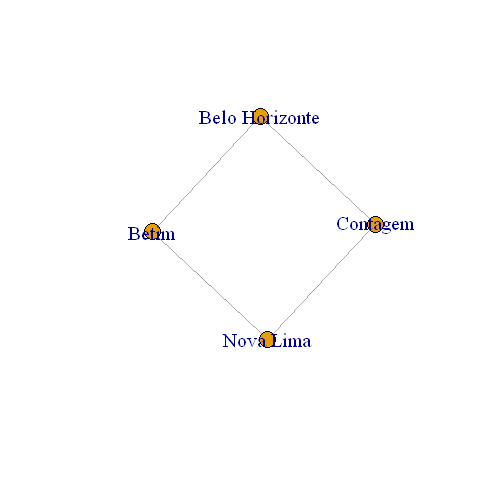

In [38]:
graphic = graph(edge=c("Betim","Belo Horizonte", "Belo Horizonte", "Contagem", "Contagem","Nova Lima", "Nova Lima","Betim"), directed=F)
plot(graphic)

- O parâmetro isolates gera vértices isolados

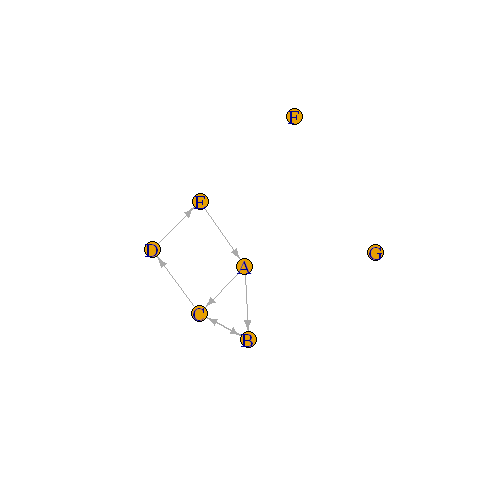

In [39]:
graph <- graph(edges= c("A","B", "B","C", "C","D", "D","E", "E","A", "A","C", "C","B"), isolates=c("F","G"))
plot(graph)

- Adicionar Pesos

In [11]:
graphic = graph(edge=c("Betim","Belo Horizonte", "Belo Horizonte", "Contagem", "Contagem","Nova Lima", "Nova Lima","Betim"), directed=F)
V(graphic)$Peso = c(10,30,40,70)
vertex_attr(graphic)
E(graphic)$weight = c(1,2,3,4)
graphic

$name
[1] "Betim"          "Belo Horizonte" "Contagem"       "Nova Lima"     

$Peso
[1] 10 30 40 70

IGRAPH 0f16033 UNW- 4 4 -- 
+ attr: name (v/c), Peso (v/n), weight (e/n)
+ edges from 0f16033 (vertex names):
[1] Betim         --Belo Horizonte Belo Horizonte--Contagem      
[3] Contagem      --Nova Lima      Betim         --Nova Lima     

## Grafos literais - graphs_from_literal

- Em grafos literais usamdo:
    - Sinal de soma (+) para indicar inciência
    - Sinal de negatrivo (-) para indicar ausência de incidência
- Desta forma o a par (a-+b) indica que A incide em B
- O par (a++b) indica que A incide em B e B incide em A
- O par (a-b) indica uma aresta não direcionada entre A e B

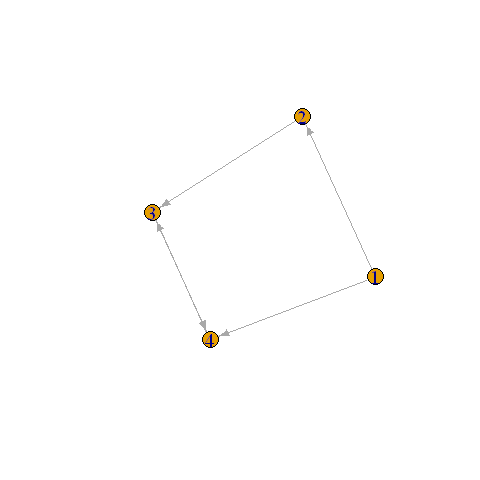

In [20]:
graphic = graph_from_literal(1-+2, 2-+3, 3++4, 4+-1)
plot(graphic)

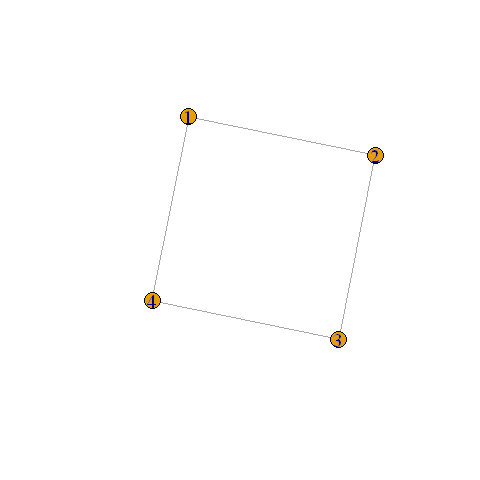

In [21]:
graphic = graph_from_literal(1-2, 2-3, 3-4, 4-1)
plot(graphic)

- Podemos gerar grafos desconexos usando a vírgula
- Da mesma forma que podemos conectar vértices usadno os sinais matemáticos, sem o usuo da vírgula

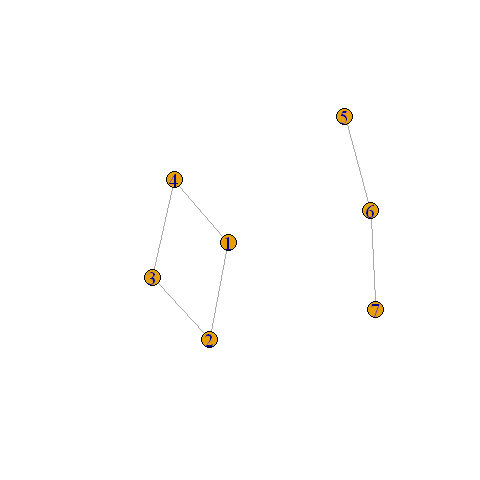

In [28]:
graphic = graph_from_literal(1-2-3-4-1, 5-6-7)
plot(graphic)

## Estrutura do grafo

- Igraph pode ser visto como uma matriz de adjacência

In [40]:
graph <- graph(edges= c("A","B", "B","C", "C","D", "D","E", "E","A", "A","C", "C","B"), isolates=c("F","G"))
graph[]

7 x 7 sparse Matrix of class "dgCMatrix"
  A B C D E F G
A . 1 1 . . . .
B . . 1 . . . .
C . 1 . 1 . . .
D . . . . 1 . .
E 1 . . . . . .
F . . . . . . .
G . . . . . . .

- Ver o nome dos vértices

## Visualização

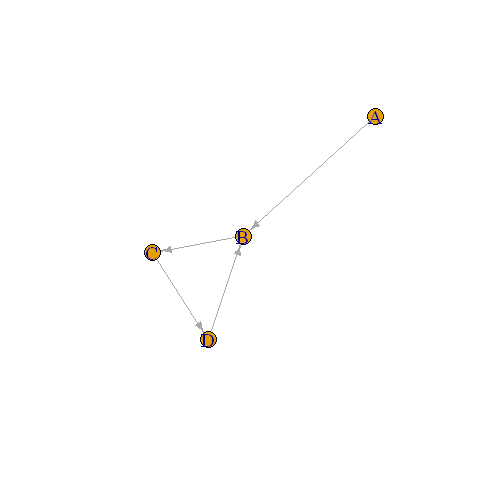

In [24]:
graphic <- graph(edges = c("A","B", "C","D", "D","B", "B","C"))
V(graphic)$Peso <- c(40, 30, 30, 25)
E(graphic)$Local <- c("MG", "SP", "ES", "RJ")
E(graphic)$weight <- c(1, 2, 3, 4)
V(graphic)$type <- "Cididades"
plot(graphic)

### Tamanho do vértice de acordo com o peso

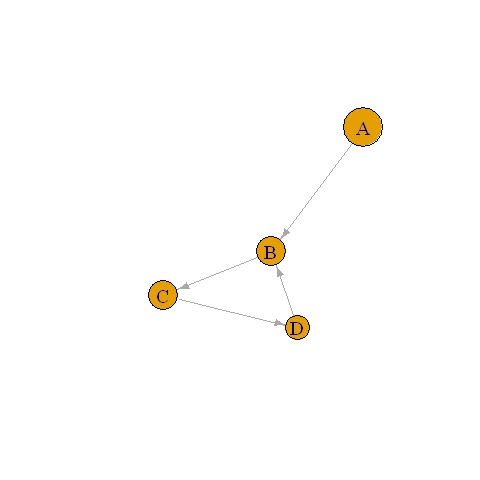

In [25]:
plot(graphic, vertex.size=vertex_attr(graphic)$Peso)

### Tamanho da aresta de acordo com o peso

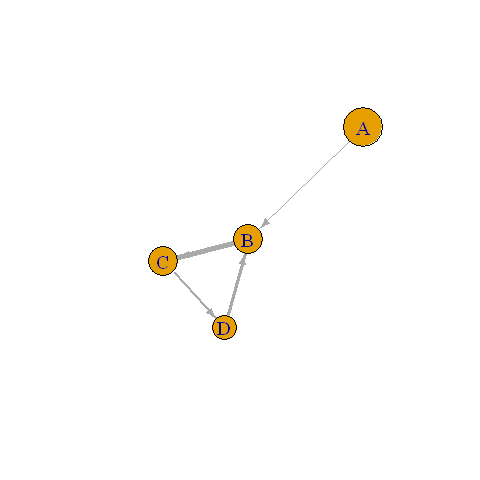

In [26]:
plot(graphic, vertex.size=vertex_attr(graphic)$Peso, edge.width=edge_attr(graphic)$weight)

### Cores aos vértices em um atributo

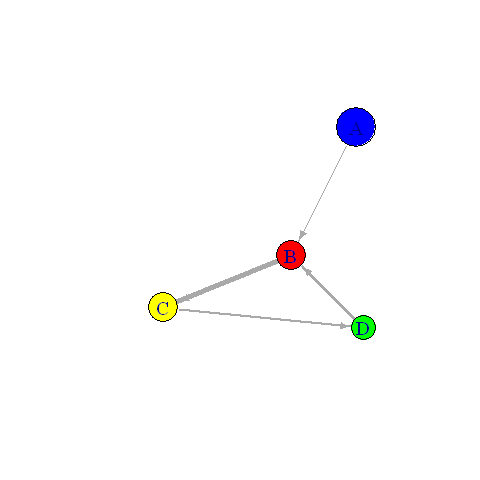

In [27]:
vertex_attr(graphic)$Cor = c("Blue", "Red", "Yellow", "Green")
plot(graphic, vertex.size=vertex_attr(graphic)$Peso, edge.width=edge_attr(graphic)$weight, vertex.color = vertex_attr(graphic)$Cor)

### Curvado, Título e Frame

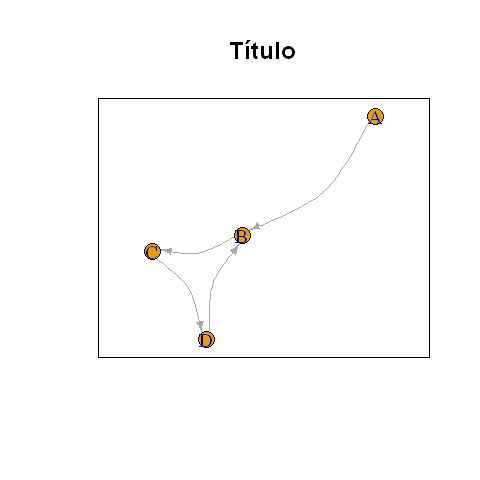

In [29]:
plot(graphic, edge.curved = 0.4, frame= T, main = "Título")

### Tipo do vértice

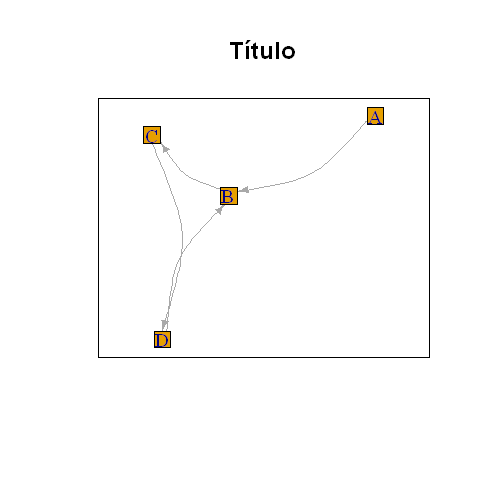

In [30]:
plot(graphic, edge.curved = 0.4, frame= T, main = "Título", vertex.shape = 'square')

### Grafo iterativo

In [3]:
out = read_graph("datasets/Grafo.graphml", format = c ("graphml"))
tkplot(out)

[1] 1

# Métricas

##  Grau

- degree - mostra o grau 
    - mode 
        - all - mostra os graus de entrada e saída
        - in - mostra os graus de entrada
        - out - mostra os graus de saída
    

 [1] 11  7  8 10 10  7  5  0  6  2 13  2  2 18 26  8  6  7  2  0  4 13 15  9  8
[26]  3  2  2  3  7  6  2  4  0  1 13  4 14  5  0 15  4  4  5  9 14  3  0 13  8
[51]  8  5  5
 [1]  3  3  5  6  4  4  2  0  2  1  5  1  1  4  9  4  1  6  0  0  1 10  4  4  3
[26]  3  1  1  2  4  5  1  2  0  1  9  2 12  3  0  5  3  4  2  6  4  2  0  9  4
[51]  3  4  4
 [1]  8  4  3  4  6  3  3  0  4  1  8  1  1 14 17  4  5  1  2  0  3  3 11  5  5
[26]  0  1  1  1  3  1  1  2  0  0  4  2  2  2  0 10  1  0  3  3 10  1  0  4  4
[51]  5  1  1


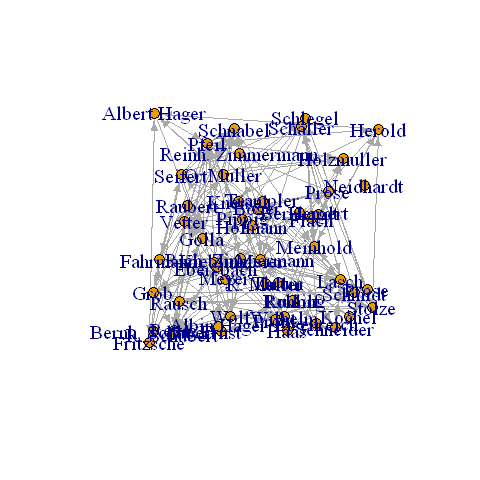

In [7]:
graph = read_graph("../datasets/Grafo.graphml", format = c ("graphml"))
plot(graph)
print(degree(graph, mode = "all"))
print(degree(graph, mode = "out"))
print(degree(graph, mode = "in"))

## Diametro

- O diametro mostra a distância entre diferentes vértices
    - directed - F or T, considerando se é direcionado ou não

In [8]:
diameter(graph, directed = T)
diameter(graph, directed = F)

[1] 8

[1] 5

- a função get_diameter mostra os vértices da maior distância

In [9]:
get_diameter(graph, directed = T)
get_diameter(graph, directed = F)

+ 9/53 vertices, from fcffc13:
[1]  7 16  3  4 49 38 39 33 27

+ 6/53 vertices, from fcffc13:
[1] 10  4  6 22 33 27

## Vizinhança
    - zero incluindo o próprio vértice
    - mode all considera o grafo como não direcionado

In [11]:
neighborhood(graph, 0, mode=c('all'))

[[1]]
+ 1/53 vertex, from fcffc13:
[1] 1

[[2]]
+ 1/53 vertex, from fcffc13:
[1] 2

[[3]]
+ 1/53 vertex, from fcffc13:
[1] 3

[[4]]
+ 1/53 vertex, from fcffc13:
[1] 4

[[5]]
+ 1/53 vertex, from fcffc13:
[1] 5

[[6]]
+ 1/53 vertex, from fcffc13:
[1] 6

[[7]]
+ 1/53 vertex, from fcffc13:
[1] 7

[[8]]
+ 1/53 vertex, from fcffc13:
[1] 8

[[9]]
+ 1/53 vertex, from fcffc13:
[1] 9

[[10]]
+ 1/53 vertex, from fcffc13:
[1] 10

[[11]]
+ 1/53 vertex, from fcffc13:
[1] 11

[[12]]
+ 1/53 vertex, from fcffc13:
[1] 12

[[13]]
+ 1/53 vertex, from fcffc13:
[1] 13

[[14]]
+ 1/53 vertex, from fcffc13:
[1] 14

[[15]]
+ 1/53 vertex, from fcffc13:
[1] 15

[[16]]
+ 1/53 vertex, from fcffc13:
[1] 16

[[17]]
+ 1/53 vertex, from fcffc13:
[1] 17

[[18]]
+ 1/53 vertex, from fcffc13:
[1] 18

[[19]]
+ 1/53 vertex, from fcffc13:
[1] 19

[[20]]
+ 1/53 vertex, from fcffc13:
[1] 20

[[21]]
+ 1/53 vertex, from fcffc13:
[1] 21

[[22]]
+ 1/53 vertex, from fcffc13:
[1] 22

[[23]]
+ 1/53 vertex, from fcffc13:
[1] 23

[[24]]

## Densidade


In [12]:
edge_density(graph)

[1] 0.0649492

## Teste de isomorfismo

In [14]:
graph2 = graph
isomorphic(graph2, graph)

[1] TRUE

# Distâncias e Caminhos

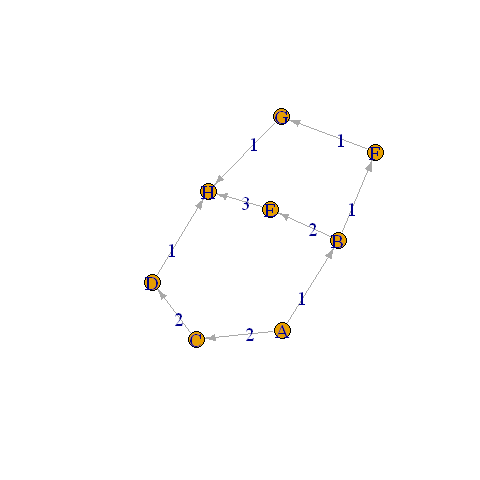

In [18]:
dist = graph(edges=c("A","C","A","B","B","E","B","F","C","D","G","H","D","H","E","H","F","G"),directed=TRUE)
# Os pesos irão representar as distâncias
E(dist)$weight = c(2,1,2,1,2,1,1,3,1)
plot(dist, edge.label = E(dist)$weight)
#tkplot(dist, edge.label = E(dist)$weight, vertex.color="white")

## Distância mais Curta

- Mostrar a distância entre dois vértices

In [21]:
distances(dist, V(dist)$name=="A", V(dist)$name=="H")

,H
A,4


- Mostrar o caminho mais curto entre dois vértices

In [23]:
caminho = shortest_paths(dist, V(dist)$name=="A", V(dist)$name=="H", output=c("both"))
caminho$vpath

[[1]]
+ 5/8 vertices, named, from a0c4f24:
[1] A B F G H


- Destacar o caminho mais curto 

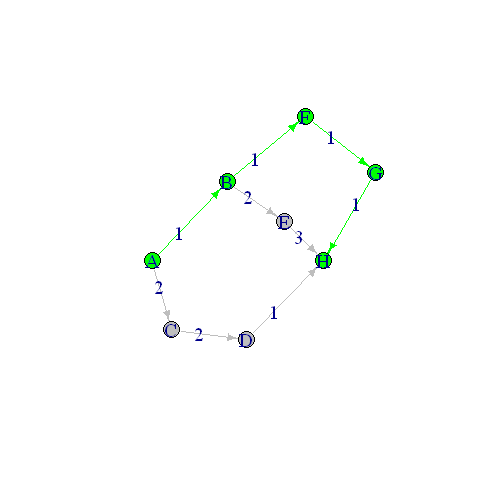

In [24]:
#percorre os vértices
for(i in 1:length(V(dist))){ #se estiver na lista do caminho mais curto pinta de verde, se não cinza
    V(dist)$color[i] <- ifelse(i  %in% as.vector(unlist(caminho$vpath)), "green","gray")
}

for(i in 1:length(E(dist))){  #se estiver na lista do caminho mais curto pinta de verde, se não cinza
    E(dist)$color[i] <- ifelse(i  %in% as.vector(unlist(caminho$epath)), "green","gray")
}

plot(dist, edge.label = E(dist)$weight)

# Comunidades e Cliques

- São algorítmos para detectar as comunidades de uma rede 

In [27]:
grafo = read_graph("datasets/Grafo.graphml", format = c("graphml"))
grafo = as.undirected(grafo)

- Detectar Comunidades

In [30]:
#detecta comunidades
comun = cluster_edge_betweenness(grafo)
#visualiza
print(comun)

Warning message in cluster_edge_betweenness(grafo):
"At community.c:460 :Membership vector will be selected based on the lowest modularity score."Warning message in cluster_edge_betweenness(grafo):
"At community.c:467 :Modularity calculation with weighted edge betweenness community detection might not make sense -- modularity treats edge weights as similarities while edge betwenness treats them as distances"

IGRAPH clustering edge betweenness, groups: 22, mod: 0.19
+ groups:
  $`1`
  [1]  1  4 14 30 37 46 50
  
  $`2`
   [1]  2  6 15 22 25 31 41 42 44 45 49 51 53
  
  $`3`
  [1]  3 11 18 23 29 36 38 39
  
  $`4`
  + ... omitted several groups/vertices


 [1]  1  2  3  1  4  2  5  6  7  8  3  9 10  1  2  5 11  3  5 12 13  2  3  4  2
[26] 14 15 16  3  1  2 17 15 18 19  3  1  3  3 20  2  2 11  2  2  1 21 22  2  1
[51]  2  5  2


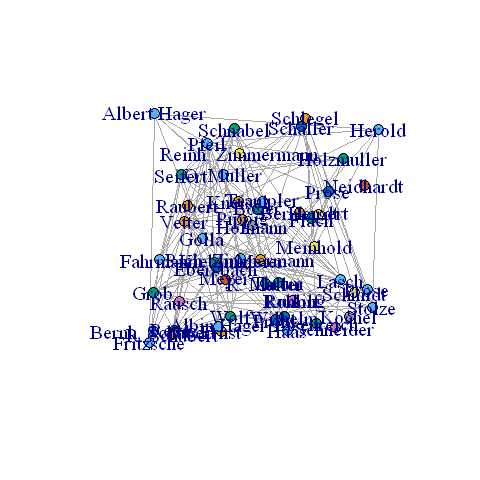

In [31]:
#cada vértice para qual comunidade pertecen
print(comun$membership)
#impressão usando cor para comunidade
plot(grafo, vertex.color = comun$membership)

- Cliques 

In [34]:
#min é número minimo de membros
cli = cliques(as.undirected(grafo), min=4)
length(cli)

[1] 17

In [35]:
cli

[[1]]
+ 4/53 vertices, from 531f609:
[1]  1  4 14 46

[[2]]
+ 4/53 vertices, from 531f609:
[1] 14 15 46 50

[[3]]
+ 4/53 vertices, from 531f609:
[1] 22 41 45 49

[[4]]
+ 4/53 vertices, from 531f609:
[1] 15 22 45 49

[[5]]
+ 4/53 vertices, from 531f609:
[1] 14 30 46 50

[[6]]
+ 4/53 vertices, from 531f609:
[1]  1 14 30 46

[[7]]
+ 4/53 vertices, from 531f609:
[1]  2 15 25 51

[[8]]
+ 4/53 vertices, from 531f609:
[1] 15 25 38 49

[[9]]
+ 4/53 vertices, from 531f609:
[1] 18 23 38 39

[[10]]
+ 4/53 vertices, from 531f609:
[1]  4 14 23 46

[[11]]
+ 4/53 vertices, from 531f609:
[1]  5 14 15 23

[[12]]
+ 4/53 vertices, from 531f609:
[1] 15 23 43 46

[[13]]
+ 4/53 vertices, from 531f609:
[1] 14 15 23 46

[[14]]
+ 4/53 vertices, from 531f609:
[1] 11 15 38 49

[[15]]
+ 4/53 vertices, from 531f609:
[1] 11 15 22 49

[[16]]
+ 4/53 vertices, from 531f609:
[1]  5  6 14 15

[[17]]
+ 4/53 vertices, from 531f609:
[1]  2  6 15 22


# Exemplos de Grafos

In [36]:
#install.packages("igraphdata")
library("igraphdata")

package 'igraphdata' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Adria\AppData\Local\Temp\RtmpARiXdl\downloaded_packages


Warning message:
"package 'igraphdata' was built under R version 3.6.3"

## Caso das pontes de Koenigsberg

IGRAPH 227bd5e UN-- 4 7 -- The seven bidges of Koenigsberg
+ attr: name (g/c), name (v/c), Euler_letter (v/c), Euler_letter (e/c),
| name (e/c)
+ edges from 227bd5e (vertex names):
[1] Altstadt-Loebenicht--Kneiphof          
[2] Altstadt-Loebenicht--Kneiphof          
[3] Altstadt-Loebenicht--Lomse             
[4] Kneiphof           --Lomse             
[5] Vorstadt-Haberberg --Lomse             
[6] Kneiphof           --Vorstadt-Haberberg
[7] Kneiphof           --Vorstadt-Haberberg

Altstadt-Loebenicht            Kneiphof  Vorstadt-Haberberg               Lomse 
                  3                   5                   3                   3

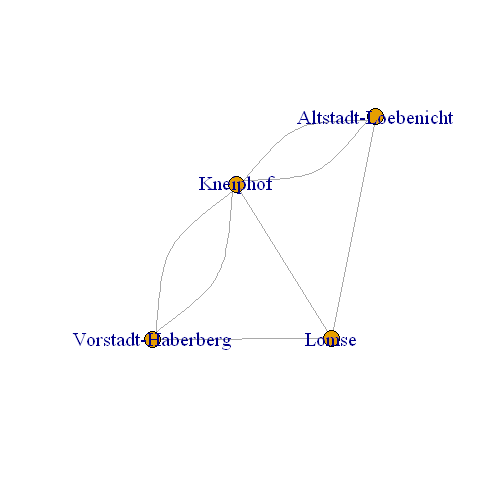

In [37]:
data(Koenigsberg)
Koenigsberg
plot(Koenigsberg)
#graus impares, não é um grafo euleriano
degree(Koenigsberg, mode="all")

## Rede Social Básica

A B C D E F G H I J 
4 4 3 6 3 5 5 3 2 1

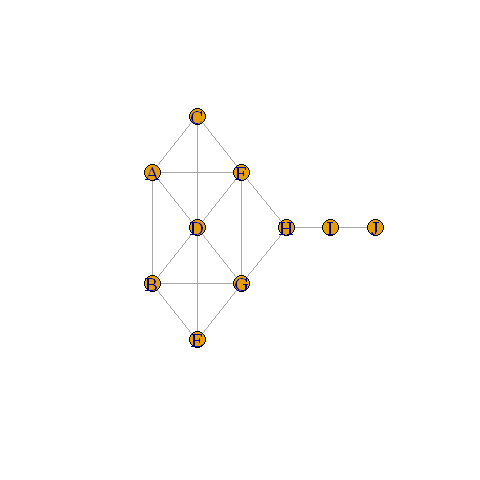

In [38]:
data(kite)
degree(kite, mode="all")
plot(kite)

## Amizades em uma faculdade

- Detectar os grupos de amizades

IGRAPH 6f42903 D-W- 81 817 -- 
+ attr: Type (g/c), Date (g/c), Citation (g/c), Author (g/c), Group
| (v/n), weight (e/n)
+ edges from 6f42903:
 [1] 57->52 76->42 12->69 43->34 28->47 58->51  7->29 40->71  5->37 48->55
[11]  6->58 21-> 8 28->69 43->21 67->58 65->42  5->67 52->75 37->64  4->36
[21] 12->49 19->46 37-> 9 74->36 62-> 1 15-> 2 72->49 46->62  2->29 40->12
[31] 22->29 71->69  4-> 3 37->69  5-> 6 77->13 23->49 52->35 20->14 62->70
[41] 34->35 76->72  7->42 37->42 51->80 38->45 62->64 36->53 62->77 17->61
[51]  7->68 46->29 44->53 18->58 12->16 72->42 52->32 58->21 38->17 15->51
[61] 22-> 7 22->69  5->13 29-> 2 77->12 37->35 18->46 10->71 22->47 20->19
+ ... omitted several edges

Warning message in cluster_edge_betweenness(UKfaculty, directed = F):
"At community.c:460 :Membership vector will be selected based on the lowest modularity score."Warning message in cluster_edge_betweenness(UKfaculty, directed = F):
"At community.c:467 :Modularity calculation with weighted edge betweenness community detection might not make sense -- modularity treats edge weights as similarities while edge betwenness treats them as distances"

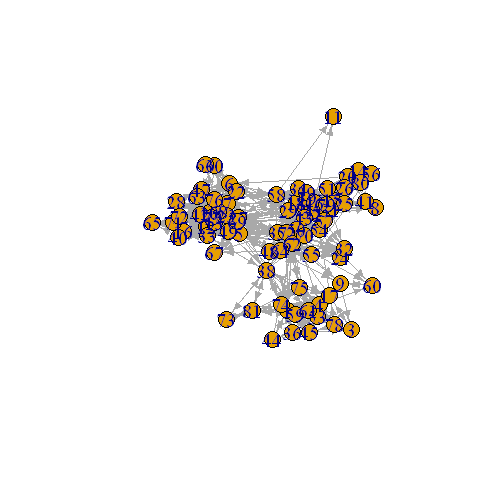

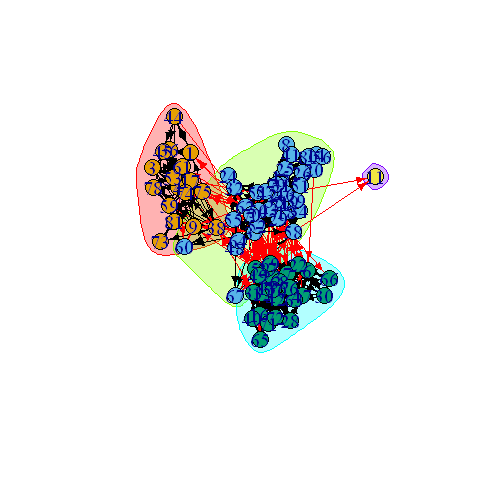

In [39]:
data(UKfaculty)
UKfaculty
plot(UKfaculty)
comun=cluster_edge_betweenness(UKfaculty, directed = F)
plot(comun,UKfaculty)